In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import time

from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
sb.set_style("dark")

sys.path.append(os.path.join(os.getcwd(), '..','src'))

In [2]:
from optimal_gardening import *

## Problem Setup

### Plant Info

In [24]:
display(plant_info)
print(f'there are {num_plants} different types of plants')
print(f'plant names: {plants}')
print(f'plant index: {plant_index}')

,name,sun,perennial,problem_plant,avg_pref
plant_index,,,,,
0,Arugula,Partial shade,0,0,6.5
1,Asparagus,Partial shade,1,0,5.5
2,Banana peppers,Full sun,0,0,5.5
3,Basil,Full sun,0,0,7.5
4,Bell peppers,Full sun,0,0,5.5
5,Blueberries,Full sun,1,0,5.5
6,Bok choy,Partial sun,0,0,5.5
7,Broccoli,Partial sun,0,0,5.5
8,Brussel sprouts,Partial shade,0,0,8.0


there are 36 different types of plants
plant names: ['Arugula' 'Asparagus' 'Banana peppers' 'Basil' 'Bell peppers'
 'Blueberries' 'Bok choy' 'Broccoli' 'Brussel sprouts' 'Butternut squash'
 'Carrots' 'Cayene peppers' 'Celery' 'Chives' 'Cilantro' 'Cucumbers'
 'Dill' 'Eggplant' 'Green beans' 'Kale' 'Lavender' 'Leeks' 'Lettuce'
 'Onions' 'Oregano' 'Parsley' 'Potatoes' 'Pumpkins' 'Rasberries'
 'Rosemary' 'Strawberries' 'Sweet potatoes' 'Thai basil' 'Tomatoes'
 'Watermelon' 'Zucchini']
plant index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]


In [4]:
#other relevant plant info
print(f'plant sun requirements: {plant_sun_req}')
print(f'perennial plants: {perennials}')
print('problem plants:',problem_plants,plant_info.iloc[problem_plants[0]]['name'])

plant sun requirements: ['Partial shade' 'Partial shade' 'Full sun' 'Full sun' 'Full sun'
 'Full sun' 'Partial sun' 'Partial sun' 'Partial shade' 'Full sun'
 'Partial shade' 'Full sun' 'Partial sun' 'Full sun' 'Full sun' 'Full sun'
 'Full sun' 'Full sun' 'Partial sun' 'Partial sun' 'Full sun'
 'Partial sun' 'Partial shade' 'Partial sun' 'Full sun' 'Full sun'
 'Partial sun' 'Full sun' 'Full sun' 'Full sun' 'Full sun' 'Full sun'
 'Full sun' 'Full sun' 'Full sun' 'Full sun']
perennial plants: [1, 5, 13, 20, 24, 25, 28, 29, 30]
problem plants: [33] Tomatoes


In [23]:
plant_info[['name','sun','avg_pref']].sort_values('avg_pref',ascending=False).head(10)

,name,sun,avg_pref
plant_index,,,
28,Rasberries,Full sun,10.0
9,Butternut squash,Full sun,8.5
18,Green beans,Partial sun,8.0
8,Brussel sprouts,Partial shade,8.0
3,Basil,Full sun,7.5
15,Cucumbers,Full sun,7.5
33,Tomatoes,Full sun,7.0
32,Thai basil,Full sun,7.0
30,Strawberries,Full sun,7.0


### Bed Info

In [6]:
display(bed_info.head())
print(f'there are {num_beds} garden beds')
print(f'bed names: {beds}')
print(f'bed index: {bed_index}')

,bed,sun,x,y
bed_index,,,,
0,1,Full sun,0,0
1,2,Partial sun,1,0
2,3,Partial shade,2,0
3,4,Full sun,0,1
4,5,Partial sun,1,1


there are 42 garden beds
bed names: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
bed index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]


<AxesSubplot:>

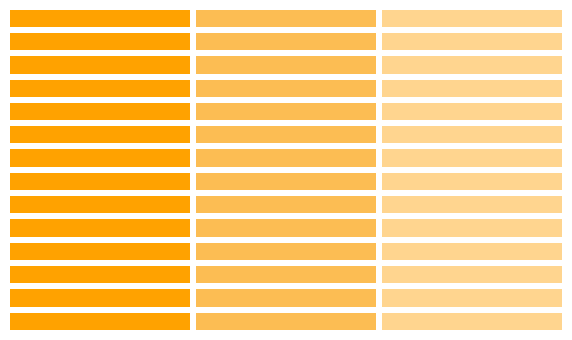

In [7]:
visualize_garden(bed_info)

### Time Dimension

In [8]:
print(f'we are planning {num_years} years out')
print(f'years: {years}')
print(f'year index: {year_index}')

we are planning 3 years out
years: [1 2 3]
year index: [0 1 2]


### Possible Solutions
Here we can look at the possible solutions to the problem as a graph. Not all edges can be traversed (i.e. certain plants cannot be assigned to certain beds due to the sun constraint). 

In [9]:
print(f'{num_plants*num_beds*num_years} binary decisions need to be made.')

4536 binary decisions need to be made.


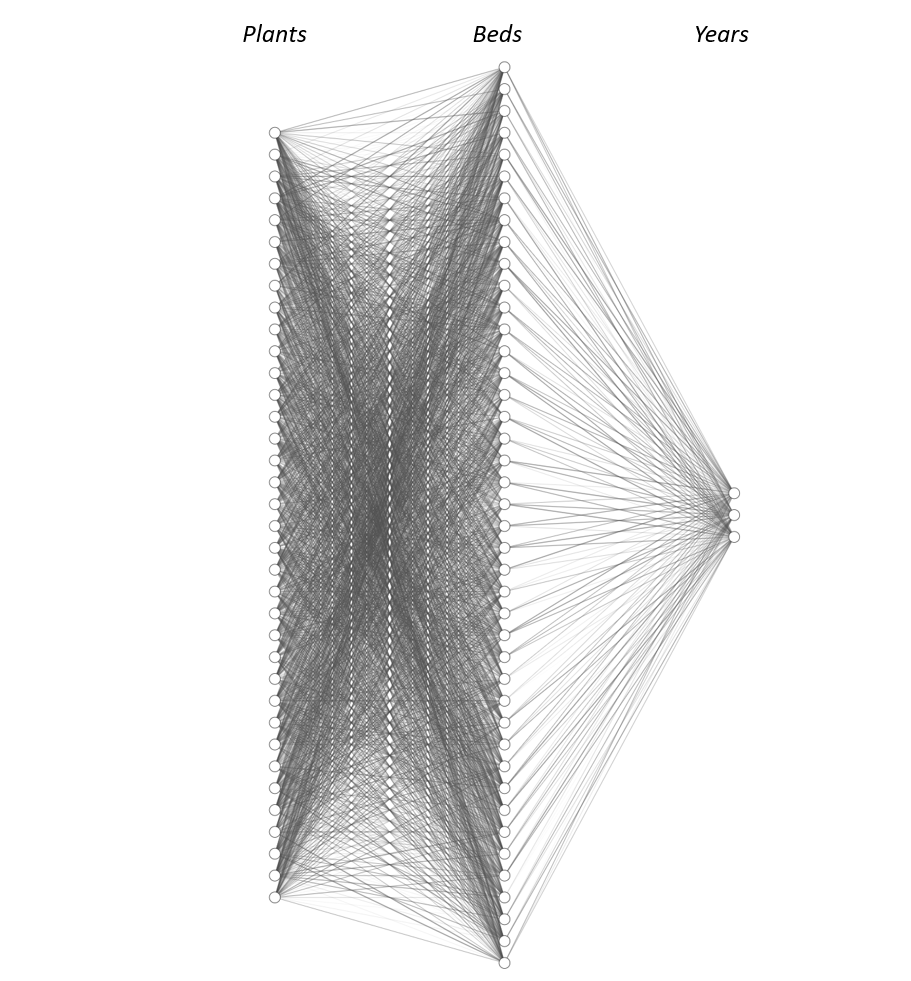

In [10]:
Image(os.path.join(os.getcwd(),'..','img','solution_space_viz.png'))

## First Approach: Heuristics
A good initial approach is to implement a heuristic. We will use simulated annealing, but will follow a recipe that applies to most, if not all metaheuristic search techniques. 

- 1: An initial starting point 
- 2: A search strategy 
- 3: An objective
- 4: A solution acceptance criteria 

### 1. An Initial Starting Point
This can be a random initial solution or the ouput of another heuristic (e.g. a greedy search method). 

In [11]:
#initialize plan. no plants in any bed
initial_plan = np.zeros(shape=(num_plants,num_beds,num_years))

#put a random crop in each bed for all years
for bed in bed_index:
    plant = np.random.choice(plant_index)
    initial_plan[plant][bed] = 1
    
print(f'plan shape: {initial_plan.shape}')
print(initial_plan)
print('initial plan for the first bed in the first year')
print()
print(initial_plan[:,0,0])

plan shape: (36, 42, 3)
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [1. 1. 1.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
initial plan for the first bed in the first year

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### 2. A search strategy
A well-defined way of moving from one candidate solution to another **feasible** solution within the solution space. The search strategy will be stochastic, but in generating a neighboring solution we will only tweak our solution in some minor way. 

In [12]:
def make_neighbor(plan):
    #pick a random plant
    plant = np.random.choice(plant_index)
    #pick a random bed
    bed = np.random.choice(bed_index)
    #pick a random year
    year = np.random.choice(year_index)

    #implement decision
    new_plan = plan.copy()
    new_plan[:,bed,year] = np.zeros(shape=(num_plants)) #zero out previous decision for the bed in the year
    new_plan[plant,bed,year] = 1 #grow plant in bed during year

    #enforce constraints
    new_plan = enforce_perennial_constraint(new_plan,plant,bed,year,perennials)
    new_plan = enforce_sun_constraint(new_plan,sun_constraint)
    new_plan = enforce_disease_constraint(new_plan,problem_plants)
        
    return new_plan

### 3: An objective
A way of measuring the quality of a solution. We will weight each individual objective. Individual objectives in this case are both scores 0 - 100. However, if they were on different scales, we may want to scale the individual objective values (perhaps using the initial objective values). 

In [13]:
def get_objective(plan,weights):
    yummy_score = compute_yummy_score(plan,preferences,max_yums)
    variety_score = compute_variety_score(plan,num_plants)
    objective = (weights['yummy_score']*yummy_score
               + weights['variety_score']*variety_score)
    return (objective,{'objective':objective,'yummy_score':yummy_score,'variety_score':variety_score})

### 4: A solution acceptance criteria 
A way of deciding whether or not to accept a neighboring solution as the new current solution. This is where annealing and temperature comes in. Better solutions are always accepted. Worse solutions are probabalistically accepted based on the current temperature. The temperature starts out high and is lowered on a schedule. When the temperature is high, the probability of accepting a worse solution is high. As it is lowered, we move into local search. 
This allows us to search for a global optimum more widely before honing our search. 

$ e^\frac{(n-c)}{t} > U(0,1)$

When the temperature is high, there is more tolerance for accepting significantly worse solutions (i.e. numerator can be more negative)
<br>
When the temperature is low, there is less tolerance for the new solution to be significantly worse than the current solution.  

In [14]:
def decide_to_accept_neighbor(new_objective,current_objective,temperature,method='SA'):
    if method=='SA':
        accept_neighbor = new_objective > current_objective or np.exp((new_objective-current_objective) / temperature) > np.random.uniform()

    if method=='LS':
        accept_neighbor = new_objective > current_objective 

    return accept_neighbor

### Bring it all together 

In [15]:
def optimize(initial_plan,weights,starting_temperature=10000,alpha=0.99,max_SA_iter=1000,method='SA'):
    #initialize the current plan
    current_plan = initial_plan.copy()
    current_objective,current_obj_values = get_objective(initial_plan,weights)
    
    #initial where we store the best found plan
    best_plan = initial_plan.copy()
    best_objective = current_objective

    #for visualization later
    current_plan_obj_values = [(0,current_obj_values)]
    best_obj_values = [(0,current_obj_values)]
    
    #initialize the temperature with the starting temperature
    temperature = starting_temperature

    for i in range(max_SA_iter):

        #generate a new feasible solution that neighbors the current solution
        new_plan = make_neighbor(current_plan)
        
        #evaluate the new plan
        new_objective,new_obj_values = get_objective(new_plan,weights)

        #decide whether or not to accept the new plan as our new starting point from which to create a new neighbor
        accept_neighbor = decide_to_accept_neighbor(new_objective,current_objective,temperature,method=method)
        if accept_neighbor:
            current_plan = new_plan.copy()
            current_objective = new_objective
            current_plan_obj_values.append((i,new_obj_values))
          
        #update the incumbent best plan, if the new objective beats the incumbent best objective
        if new_objective > best_objective:
            best_plan = new_plan.copy()
            best_objective = new_objective
            best_obj_values.append((i,new_obj_values))      
        
        #lower the temperature
        temperature = temperature*alpha   
    
    return best_plan,best_objective,best_obj_values,current_plan_obj_values

#### Solve

In [25]:
sa_weights  = {'yummy_score': 0.5, 'variety_score': 0.5}
sa_weights

{'yummy_score': 1, 'variety_score': 0}

In [30]:
best_plan,best_objective,best_obj_values,current_plan_obj_values = optimize(initial_plan,sa_weights,max_SA_iter=100000,method='SA')

C:\Users\elynch\AppData\Local\Continuum\anaconda3\envs\thedacare\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.


In [31]:
sa_results = best_obj_values[-1][1]
sa_obj = sa_results['objective']
sa_yums = sa_results['yummy_score']
sa_variety = sa_results['variety_score']

print(f'Overall SA Objective: {sa_obj}')
print(f'SA Yummy Score: {sa_yums}')
print(f'SA Variety Score: {sa_variety}')

Overall SA Objective: 86.7
SA Yummy Score: 86.7
SA Variety Score: 8.3


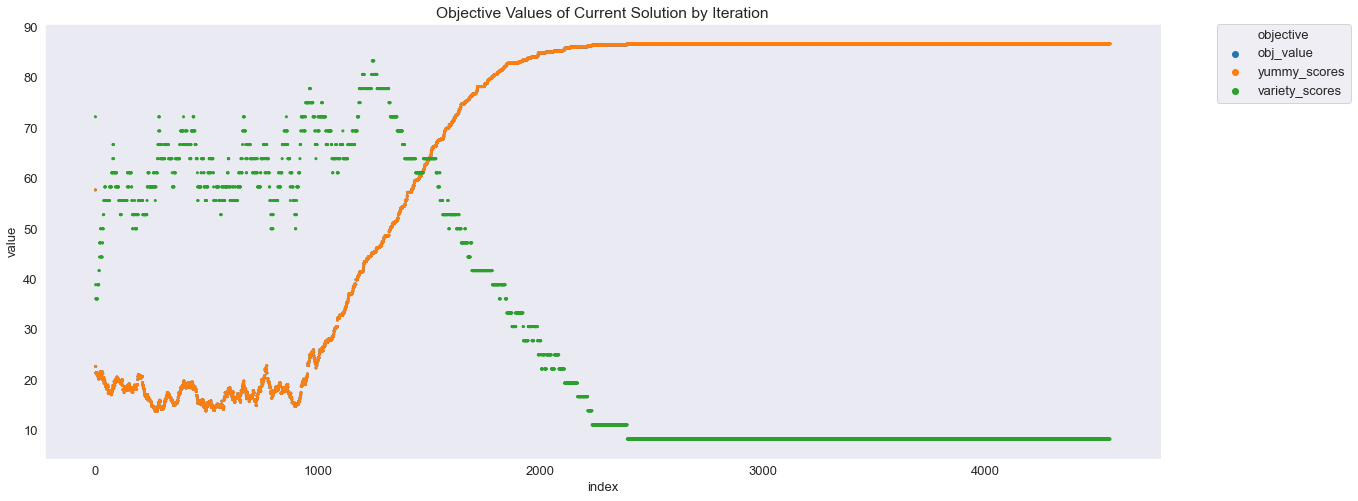

In [32]:
visualize_obj_iters(current_plan_obj_values)

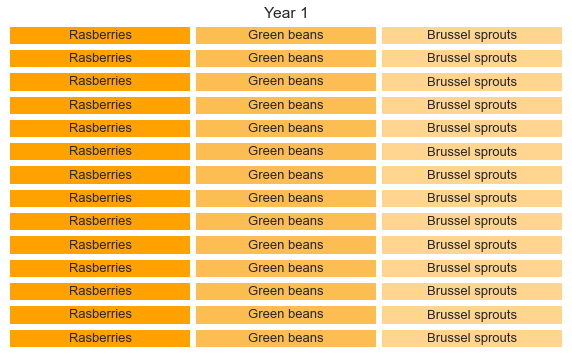

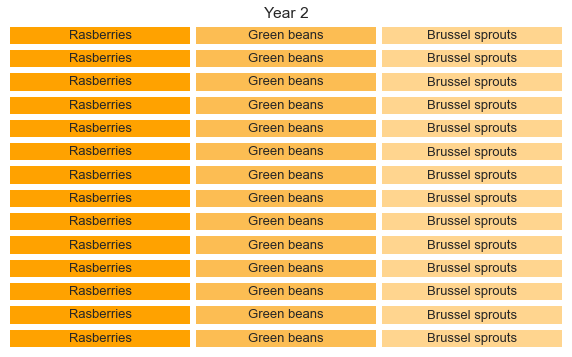

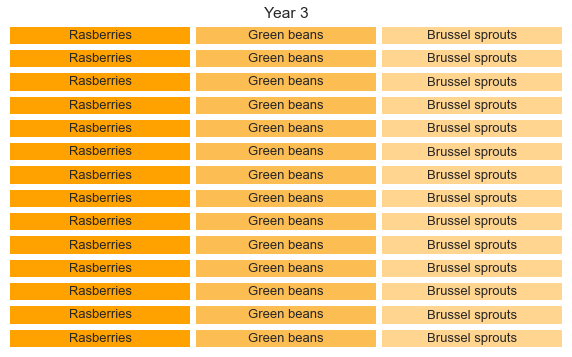

In [33]:
df_plan = annual_bed_plan(best_plan,bed_info,plant_info,bed_index,year_index)
visualize_plan(df_plan,bed_index,years)